In [1]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Crop_recommendation.csv")
df.head()


Saving Crop_recommendation.csv to Crop_recommendation.csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
df.drop_duplicates(inplace=True)



In [11]:
df['label'] = df['label'].astype('category').cat.codes


In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.361084,0.345448,0.215745,0.481798,0.667536,0.461053,0.299094,10.500000
std,0.263695,0.235613,0.253240,0.145302,0.259716,0.120357,0.197444,6.345731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.164286,0.075000,0.400108,0.536653,0.383641,0.159298,5.000000
50%,0.264286,0.328571,0.135000,0.481294,0.772424,0.454143,0.268211,10.500000
75%,0.601786,0.450000,0.220000,0.566315,0.882960,0.531681,0.373834,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


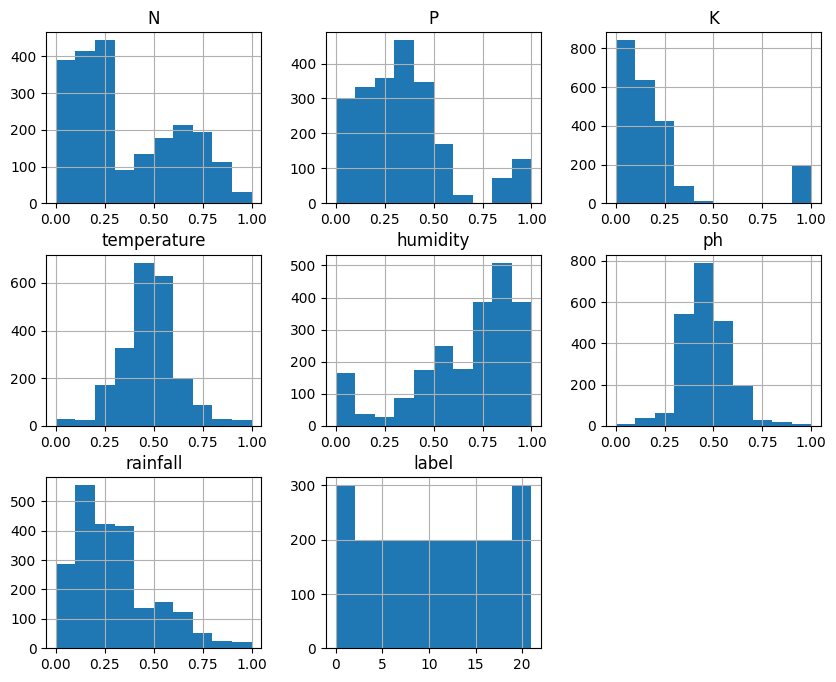

In [16]:
df.hist(figsize=(10,8))
plt.show()



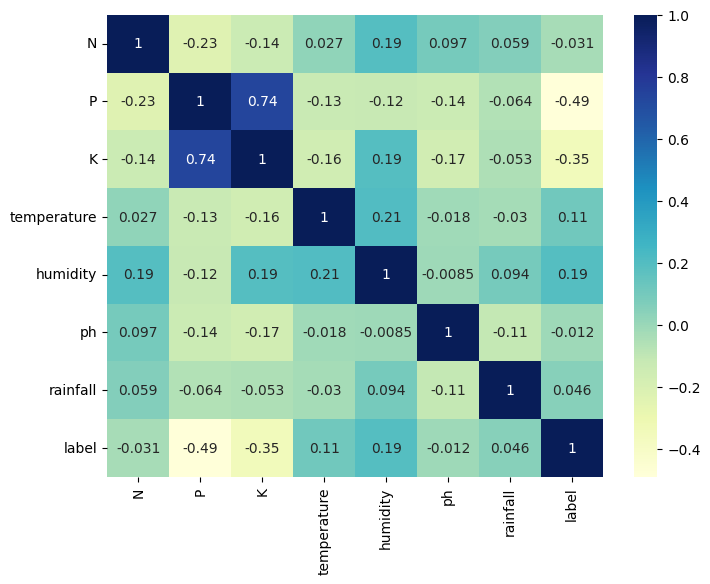

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()


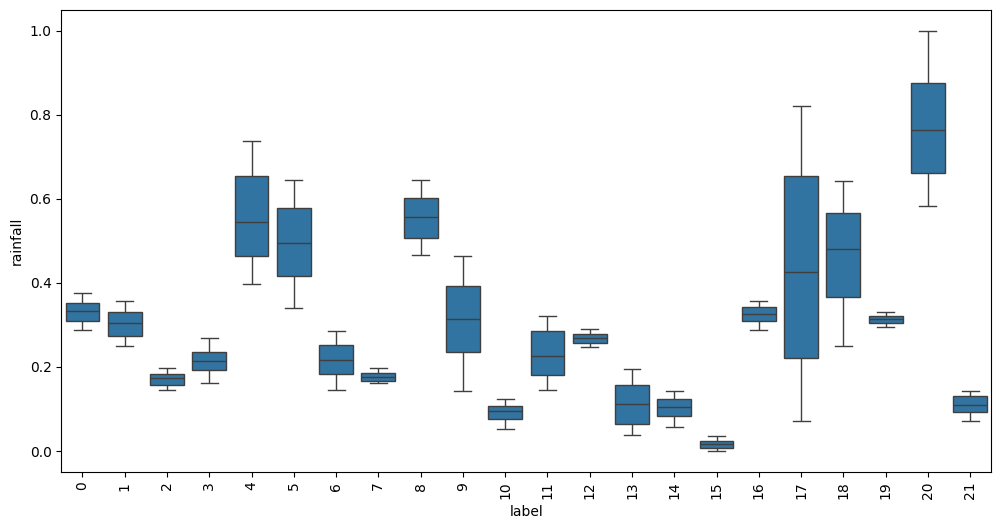

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=90)
plt.show()


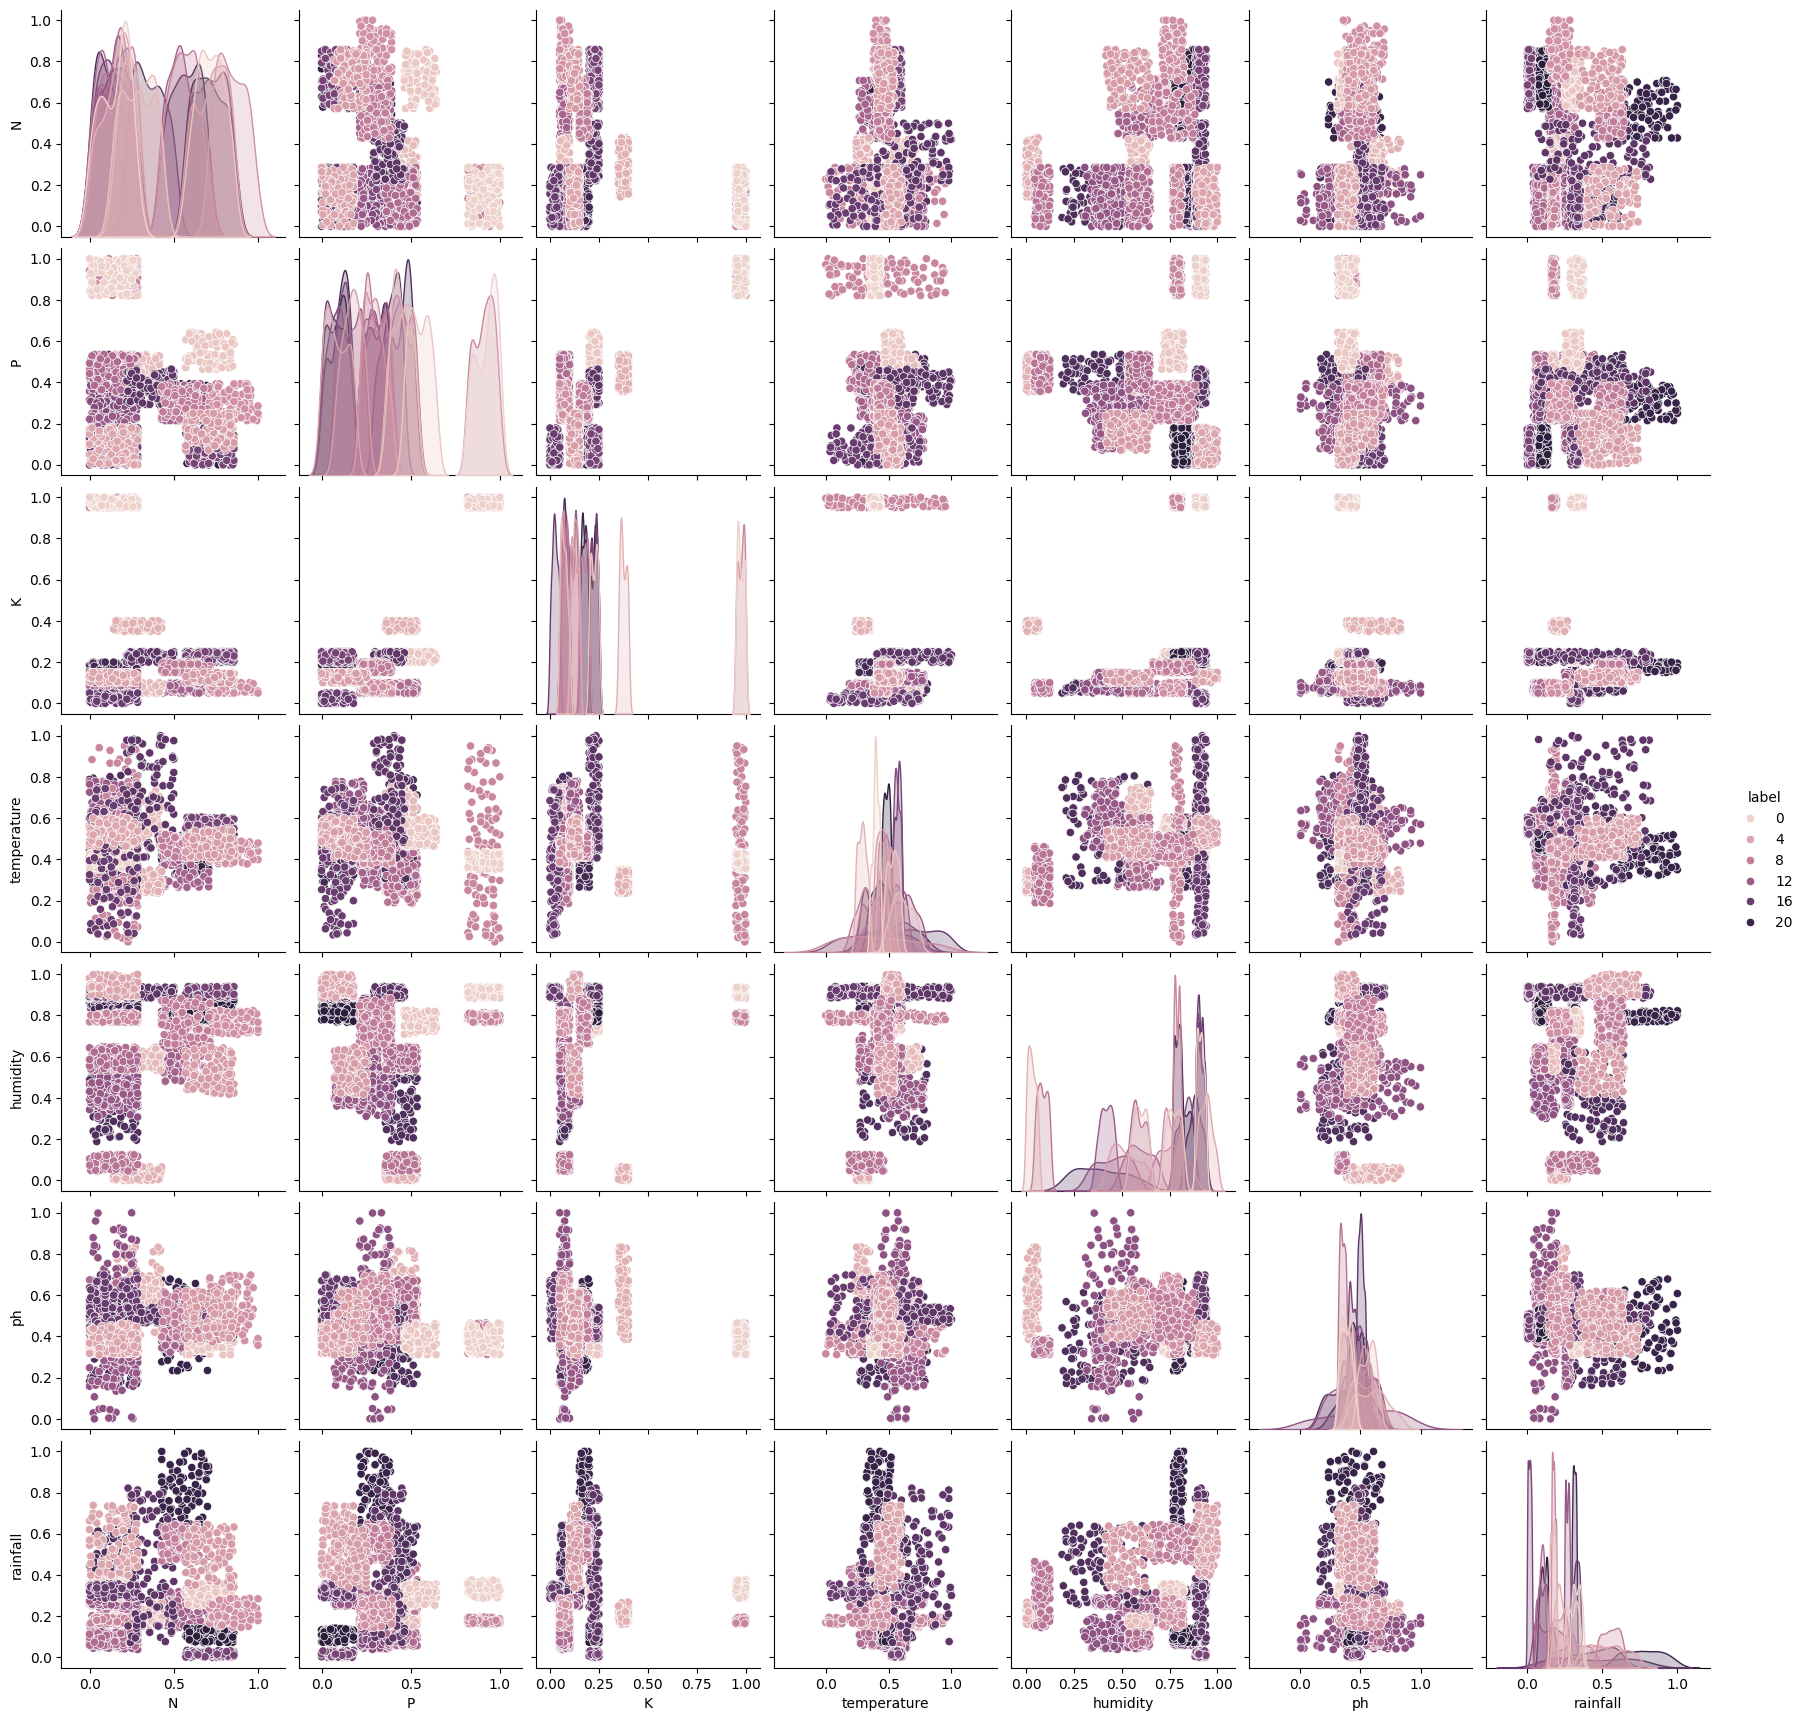

In [19]:
sns.pairplot(df, hue='label')
plt.show()


In [20]:
df.to_csv("cleaned_agri_yield.csv", index=False)
